# Ujian Modul 2 - Purwadhika Data Science JC Program

## Context - Taken from Kaggle
Did you know that claims can be filed against TSA? Sometimes US Terminal Security Agency (TSA) makes mistakes. People can get hurt and property can be damaged, lost, or stolen. Claims are generally filed against TSA for personal injuries and lost or damaged property during screenings and they keep records of every claim!

### Content
The dataset includes claims filed between 2002 through 2015.

1. Claim Number
1. Date Received
1. Incident Date
1. Airport Code
1. Airport Name
1. Airline Name
1. Claim Type
1. Claim Site
1. Item
1. Claim Amount
1. Status
1. Close Amount
1. Disposition

This data is coming from the Kaggle Dataset that contain the data of clain the been filed into the TSA. We would try to explore the data and clean the data partially (we would not clean and analyze everything as it would take more time than necessary) and we would only use 25% data from the original dataset.

This exam scoring would be explained below:

- This Notebook would have total score of 80 (+ 10 Bonus POINT for Bonus Question), which consist of:
    - 40 POINT for the Question part (10 point for each question)
    - 40 POINT for the preprocessing part by following the guide
- The Dashboard would yield 20 POINT
- The Maximum Score would be still 100, Bonus Question is just a Bonus. Work it if you have an extra time and already sure about all your other answer (or not sure about the other question, and need this bonus question to help)

When you finish, upload your notebook contain all the answers and the script for the dashboard to your github. You do not need to upload the .csv file. 

Try to read the data and show all the important info first. For starter, try to understand what each column represent.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import randn
import plotly.express as px
import re
from pingouin import welch_anova, pairwise_gameshowell, pairwise_ttests, anova
from scipy.stats import chi2,ttest_ind, mannwhitneyu, levene,bartlett, f_oneway,kruskal, shapiro, anderson, normaltest, chisquare
%matplotlib inline

C:\Users\user\Anaconda3\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning:

The package pingouin is out of date. Your version is 0.3.2, the latest is 0.3.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.



In [2]:
tsa = pd.read_csv('tsa_claims_ujian.csv')

In [3]:
testing = tsa.copy()

In [4]:
tsa.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
1,14268,20-Jun-02,6/16/2002 0:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny
3,16759,21-Aug-02,7/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full
4,17846,9-Sep-02,8/30/2002 0:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN


In [5]:
tsa.tail()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
51061,2015110926685,22-Oct-15,19-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses,-,-,NaN,NaN
51062,2015110226479,2-Nov-15,2-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Books; Magazines & Other,-,-,NaN,NaN
51063,2015120727336,16-Nov-15,14-Sep-15,-,-,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,-,-,NaN,NaN
51064,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
51065,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN


In [6]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null object
Incident Date    50496 non-null object
Airport Code     49014 non-null object
Airport Name     49014 non-null object
Airline Name     42511 non-null object
Claim Type       49106 non-null object
Claim Site       50876 non-null object
Item             50054 non-null object
Claim Amount     50074 non-null object
Status           51065 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: object(13)
memory usage: 5.1+ MB


In [7]:
tsa.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,51066,50996,50496,49014,49014,42511,49106,50876,50054,50074,51065,33786,32846
unique,51065,3522,10788,405,419,243,8,6,1854,13248,13,6009,3
top,2013121110011,27-May-04,12/22/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,182,43,2379,2286,4377,29713,39937,9183,7065,17134,17907,17147


In [8]:
tsaDesc = []
for i in tsa.columns:
    tsaDesc.append([i, 
                      tsa[i].dtypes, 
                      tsa[i].isna().sum(), 
                      round((((tsa[i].isna().sum())/(len(tsa)))*100),2), 
                      tsa[i].nunique(),
                      tsa[i].drop_duplicates().sample(2).values])
    
pd.DataFrame(tsaDesc, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Claim Number,object,0,0.00,51065,"[2011081686196, 2004052653491]"
1,Date Received,object,70,0.14,3522,"[3-Dec-10, 18-Aug-08]"
2,Incident Date,object,570,1.12,10788,"[10/12/2010 6:35, 11/22/2004 0:00]"
3,Airport Code,object,2052,4.02,405,"[ITH, LAS]"
4,Airport Name,object,2052,4.02,419,"[Hickory Regional Airport, Lincoln Municipal]"
5,Airline Name,object,8555,16.75,243,"[Horizon Air, CanJet]"
6,Claim Type,object,1960,3.84,8,"[-, nan]"
7,Claim Site,object,190,0.37,6,"[nan, Motor Vehicle]"
8,Item,object,1012,1.98,1854,[Computer - Laptop; Knick Knacks (bric-a-brack...
9,Claim Amount,object,992,1.94,13248,"[$5;280.00 , $147.58 ]"


If you notice, there is '-' value that become a filler for an empty value. Replace all these '-' in every column into NaN object (np.nan) 

In [9]:
tsa = tsa.replace('-',np.NaN)
tsa.tail()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
51061,2015110926685,22-Oct-15,19-Oct-15,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses,NaN,NaN,NaN,NaN
51062,2015110226479,2-Nov-15,2-Nov-15,NaN,NaN,NaN,Passenger Property Loss,Checkpoint,Books; Magazines & Other,NaN,NaN,NaN,NaN
51063,2015120727336,16-Nov-15,14-Sep-15,NaN,NaN,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,NaN,NaN,NaN,NaN
51064,2015120427297,20-Nov-15,16-Oct-15,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,NaN,NaN,NaN
51065,2016010428072,22-Dec-15,20-Dec-15,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Clothing,NaN,NaN,NaN,NaN


Try to convert the Date Received and Incident Date data type into Datetime object. For the Incident Date columns, if you directly try to convert the column into datetime object it would raise an error notice. In that case, try to show the dataframe with the Incident Date column contain all the error.  

In [10]:
tsa['Date Received'] = pd.to_datetime(tsa['Date Received'])

In [11]:
tsa['Incident Date'] = pd.to_datetime(tsa['Incident Date'])

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 200-05-17 00:00:00

In [12]:
errors = []
for i, item in enumerate(tsa['Incident Date']):
    try:
        pd.to_datetime(item)
    except ValueError:
        errors.append(i)
errors

[13729,
 14323,
 14856,
 14976,
 14995,
 15278,
 15934,
 16813,
 17198,
 19151,
 21528,
 22161,
 23232,
 24355,
 24525,
 24768,
 24903,
 25249,
 25705,
 25734,
 26129,
 26530,
 27086,
 27481,
 27628,
 27819,
 27901,
 28031,
 28037,
 29065,
 29652,
 31140,
 31570,
 31590,
 31771,
 33613]

In [13]:
tsa.iloc[errors]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,2005-01-24,17-MAY-0200 00:00,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,2005-02-23,17-FEB-0205 00:00,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,2005-03-23,07-MAR-0005 00:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,2005-03-29,04-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,2005-03-30,18-MAR-0200 00:00,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,2005-04-12,12-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,2005-05-17,01-MAY-0205 00:00,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,2005-07-08,01-JUL-0200 00:00,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,2005-08-01,01-MAY-0205 00:00,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,2005-12-08,20-NOV-0205 00:00,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


In [14]:
correcting = tsa.iloc[errors]

For the data in the Incident Date column that contain error, replace the year with the year that come from the Date Received column and replace the Incident Date data type into datetime object

In [15]:
error_dates = list(tsa.loc[errors,]['Incident Date'])
def correcting_year(x):
    incident_date = x[1]
    received_yr = str(x[0].year)
    if incident_date in error_dates:
        incident_date = re.sub(r'\d{4}',received_yr,incident_date)
    return incident_date

In [16]:
tsa['Incident Date'] = tsa[['Date Received','Incident Date']].apply(correcting_year,axis=1)

In [17]:
tsa['Incident Date'] = pd.to_datetime(tsa['Incident Date'])

Check the data info and the dataframe that previously contain the error in their data to see if the data have been properly corrected.

In [18]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null datetime64[ns]
Incident Date    50496 non-null datetime64[ns]
Airport Code     48915 non-null object
Airport Name     48915 non-null object
Airline Name     41470 non-null object
Claim Type       49035 non-null object
Claim Site       50817 non-null object
Item             48918 non-null object
Claim Amount     46886 non-null object
Status           47877 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: datetime64[ns](2), object(11)
memory usage: 5.1+ MB


In [19]:
tsa.iloc[errors]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,2005-01-24,2005-05-17,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,2005-02-23,2005-02-17,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,2005-03-23,2005-03-07,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,2005-03-29,2005-03-04,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,2005-03-30,2005-03-18,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,2005-04-12,2005-03-12,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,2005-05-17,2005-05-01,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,2005-07-08,2005-07-01,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,2005-08-01,2005-05-01,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,2005-12-08,2005-11-20,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


Create a new feature of the day differences between claim received and the day of the incident called Day Differences, which contain the days that come from the Date Received column substracted by the Incident Date column (Date Received - Incident Date). We have this feature to see the time differences between when the claim made with the incident that happen.

In [20]:
tsa['Day Differences'] = (tsa['Date Received'] - tsa['Incident Date']).dt.days

Lets try to visualize the distribution of the Day Differences with all the NaN just to be dropped first

Text(0.5, 1.0, 'Day Differences Distribution')

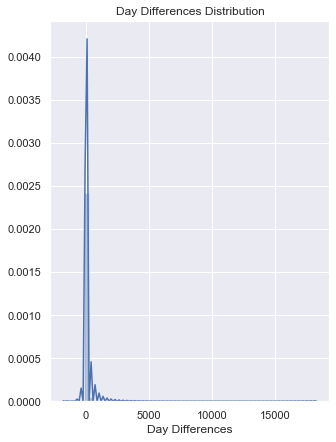

In [21]:
nonan = tsa['Day Differences'].dropna()
plt.figure(figsize = (5,7))
sns.set(style="darkgrid")
sns.distplot(nonan)
plt.title('Day Differences Distribution')

{'whiskers': [<matplotlib.lines.Line2D at 0xcd987fadc8>,
 'caps': [<matplotlib.lines.Line2D at 0xcd98ce2b08>,
 'boxes': [<matplotlib.lines.Line2D at 0xcd987f9d48>],
 'medians': [<matplotlib.lines.Line2D at 0xcd987f8a48>],
 'fliers': [<matplotlib.lines.Line2D at 0xcd988fbbc8>],
 'means': []}

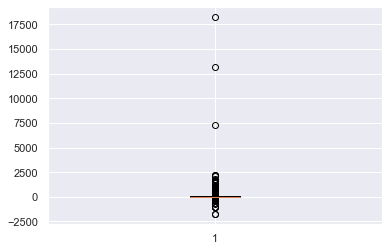

In [22]:
plt.boxplot(nonan)

If we seen it from the plot, it seems there is days that less than 0 and even over than 1000. Lets try to visualize them both

Text(0.5, 1.0, 'Day Differences Distribution less than 0')

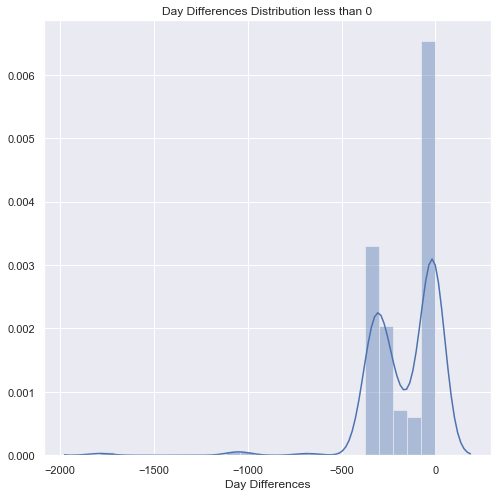

In [23]:
plt.figure(figsize = (8,8))
sns.set(style="darkgrid")
sns.distplot(nonan[nonan<0])
plt.title('Day Differences Distribution less than 0')

Text(0.5, 1.0, 'Day Differences Distribution over than 1000')

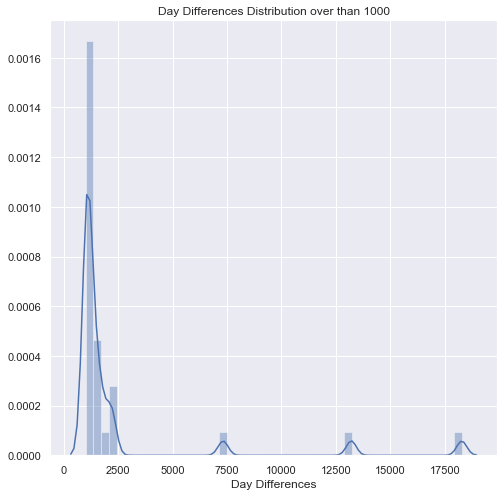

In [24]:
plt.figure(figsize = (8,8))
sns.set(style="darkgrid")
sns.distplot(nonan[nonan>1000])
plt.title('Day Differences Distribution over than 1000')

## Question

Why do you think there is day that way more than thousand days differences, and why some day differences are less than 0? (claim was made before the incident is like someone predicting a future after all).

##### 448 reported cases below 0 days
##### 30 reported cases above 1000 days

In [25]:
lower0 = tsa[tsa['Day Differences']<0]
above1k = tsa[tsa['Day Differences']>1000]

## Checking ones with less than 0 days

In [26]:
lower0['Day Differences'].describe()

count     448.000000
mean     -165.750000
std       199.907361
min     -1789.000000
25%      -303.250000
50%       -95.500000
75%       -10.000000
max        -1.000000
Name: Day Differences, dtype: float64

In [27]:
lower0half = lower0[lower0['Day Differences']<-95]
lower0half

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full,-333.0
12,0616624L,2002-09-30,2003-08-21,NaN,NaN,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$128.05,Denied,$0.00,Deny,-325.0
343,0114002M,2003-01-14,2003-12-20,LAX,Los Angeles International Airport,American Airlines,NaN,Checked Baggage,Jewelry - Fine,$1;254.83,Denied,$0.00,Deny,-340.0
350,0115048M,2003-01-15,2003-10-08,JAX,Jacksonville International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$49.99,Approved,$49.99,Approve in Full,-266.0
354,0115031M,2003-01-15,2003-09-07,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$262.50,Settled,$131.25,Settle,-235.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35034,2009080762402,2009-08-06,2010-06-22,MIA,Miami International Airport,American Airlines,Passenger Property Loss,Checked Baggage,Locks,$10.89,Denied,$0.00,Deny,-320.0
36402,2010022468707,2010-02-12,2010-12-05,SJC,Norman Y Mineta San Jose International,Southwest Airlines,Passenger Property Loss,Checked Baggage,Baggage/Cases/Purses,$0.00,Deny,NaN,NaN,-296.0
36538,2010031069407,2010-03-03,2010-12-20,EWR,Newark International Airport,Scandinavian Airlines Systems,Passenger Property Loss,Checked Baggage,Personal Electronics,$194.89,Approve in Full,NaN,NaN,-292.0
36565,2010031269527,2010-03-05,2010-12-28,TPA,Tampa International,UAL,Passenger Property Loss,Checkpoint,Home Decor,NaN,NaN,NaN,NaN,-298.0


In [28]:
lower0['Item'].value_counts()

Other                                                                                                                                                                     92
Luggage (all types including footlockers)                                                                                                                                 55
Clothing - Shoes; belts; accessories; etc.                                                                                                                                42
Computer - Laptop                                                                                                                                                         29
Jewelry - Fine                                                                                                                                                            27
                                                                                                                                       

In [29]:
lower0.head(1)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full,-333.0


In [30]:
lower0['Airline Name'].value_counts().head()

American Airlines       42
UAL                     38
Delta Air Lines         35
Continental Airlines    29
USAir                   25
Name: Airline Name, dtype: int64

In [31]:
lower0['Claim Site'].value_counts()

Checked Baggage    341
Checkpoint          95
Other                3
Name: Claim Site, dtype: int64

In [32]:
tsa['Claim Site'].value_counts()

Checked Baggage    39937
Checkpoint         10051
Other                695
Motor Vehicle        131
Bus Station            3
Name: Claim Site, dtype: int64

In [33]:
lower0['Claim Amount'].value_counts().head()

$0.00       17
$50.00      17
$300.00     10
$200.00     10
$100.00      8
Name: Claim Amount, dtype: int64

In [34]:
lower0['Item'].value_counts().head()

Other                                         92
Luggage (all types including footlockers)     55
Clothing - Shoes; belts; accessories; etc.    42
Computer - Laptop                             29
Jewelry - Fine                                27
Name: Item, dtype: int64

In [35]:
lower0['Claim Type'].value_counts()

Passenger Property Loss    249
Property Damage            169
Employee Loss (MPCECA)       5
Passenger Theft              3
Personal Injury              1
Complaint                    1
Name: Claim Type, dtype: int64

In [36]:
lower0['Claim Type'].value_counts(normalize=True) * 100

Passenger Property Loss    58.177570
Property Damage            39.485981
Employee Loss (MPCECA)      1.168224
Passenger Theft             0.700935
Personal Injury             0.233645
Complaint                   0.233645
Name: Claim Type, dtype: float64

In [37]:
lower0['Status'].value_counts().head()

Denied      190
Approved     90
Settled      73
Canceled     21
Deny         16
Name: Status, dtype: int64

In [38]:
lower0['Status'].value_counts(normalize=True) * 100

Denied                                                                                                                           44.392523
Approved                                                                                                                         21.028037
Settled                                                                                                                          17.056075
Canceled                                                                                                                          4.906542
Deny                                                                                                                              3.738318
Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.     3.037383
Approve in Full                                                                                                                   3.037383
Closed as a contractor clai

In [39]:
denied0 = lower0[lower0['Status'] == 'Denied']

In [40]:
lower0['Disposition'].value_counts().head()

Deny               191
Approve in Full     90
Settle              73
Name: Disposition, dtype: int64

In [41]:
denied0

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
12,0616624L,2002-09-30,2003-08-21 00:00:00,NaN,NaN,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$128.05,Denied,$0.00,Deny,-325.0
343,0114002M,2003-01-14,2003-12-20 00:00:00,LAX,Los Angeles International Airport,American Airlines,NaN,Checked Baggage,Jewelry - Fine,$1;254.83,Denied,$0.00,Deny,-340.0
494,0129008M,2003-01-29,2003-12-02 00:00:00,MIA,Miami International Airport,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$206.39,Denied,$0.00,Deny,-307.0
512,0616806L,2003-01-30,2003-08-09 00:00:00,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Cosmetics - Perfume; toilet articles; medicine...,$36.65,Denied,$0.00,Deny,-191.0
798,2004091362787,2003-03-04,2003-03-12 00:00:00,ATL,Hartsfield-Jackson Atlanta International Airport,Delta Air Lines,Property Damage,Checked Baggage,Luggage (all types including footlockers),$259.95,Denied,$0.00,Deny,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35644,2009102264640,2009-10-16,2009-10-16 18:00:00,LGA,LaGuardia,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics - Perfume; toilet articles; medicine...,$301.15,Denied,$0.00,Deny,-1.0
35659,2009102864895,2009-10-19,2009-10-28 14:00:00,ORF,Norfolk International,Northwest Airlines,Passenger Property Loss,Checked Baggage,Other,$241.48,Denied,$0.00,Deny,-10.0
35670,2009102864873,2009-10-20,2009-10-23 00:00:00,LAX,Los Angeles International Airport,Qantus Airways,Passenger Property Loss,Checked Baggage,NaN,$932.15,Denied,$0.00,Deny,-3.0
35807,2009111365382,2009-11-05,2009-11-13 00:00:00,ORD,Chicago O'Hare International Airport,UAL,Property Damage,Checkpoint,NaN,$300.00,Denied,$0.00,Deny,-8.0


In [42]:
lower0half['Status'].value_counts()

Denied                                                                                                                           109
Approved                                                                                                                          48
Settled                                                                                                                           44
Canceled                                                                                                                           8
Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.      7
Closed as a contractor claim                                                                                                       4
Deny                                                                                                                               2
Approve in Full                                                      

Most of the reports are about property loss or property damage, almost half of them were also denied.

## Checking reports above 1k

In [43]:
above1k['Disposition'].value_counts()

Deny               12
Approve in Full     8
Settle              3
Name: Disposition, dtype: int64

In [44]:
above1k['Claim Type'].value_counts()

Passenger Property Loss    14
Property Damage             9
Personal Injury             3
Motor Vehicle               1
Passenger Theft             1
Name: Claim Type, dtype: int64

In [45]:
above1k['Item'].value_counts()

Other                                                           6
Clothing - Shoes; belts; accessories; etc.                      4
Luggage (all types including footlockers)                       3
Jewelry - Fine                                                  3
Currency                                                        2
Sporting Equipment & Supplies                                   1
Eyeglasses - (including contact lenses)                         1
Audio - Other (Phonograph; cassettes; etc)                      1
Photographic Film                                               1
Locks                                                           1
Medicines                                                       1
PDA - Personal Data Assistants                                  1
Lighters - (cigar; cigerette; etc.); Other                      1
Cosmetics - Perfume; toilet articles; medicines; soaps; etc.    1
Name: Item, dtype: int64

In [46]:
above1k['Close Amount'].value_counts()

$0.00       16
$12.72       1
$58.25       1
$65.00       1
$8.48        1
$40.00       1
$273.00      1
$71.25       1
$90.00       1
$30.00       1
$243.50      1
$100.00      1
Name: Close Amount, dtype: int64

In [47]:
above1k['Claim Amount'].value_counts()

$100.00           2
$12.72            1
$58.25            1
$550.00           1
$800.00           1
$8.48             1
$199.99           1
$487.00           1
$1;034;650.00     1
$18.00            1
$13.78            1
$3;767.85         1
$58;750.00        1
$96.58            1
$1;065.09         1
$3;540.00         1
$29.99            1
$5;015.00         1
$32.14            1
$40.00            1
$25.00            1
$249.99           1
$273.00           1
$190.00           1
$65.00            1
$30.00            1
Name: Claim Amount, dtype: int64

### Answer: While it is always possible that the long gap is because the employees forgot to put in the information, but by looking at the data, we can get other possible reasons. 

###### A lot of the filed reports are about property loss and/ or property damage. Many are listed as 'Other' which can be vague because items such as 'art' has varying values. By looking at the 'Claim Amount', we can see that they are also high amounts, this could mean that the process can take a while for the TSA to verify expensive items before giving the requested amount.

Remove the $ sign (some data need even more clean up by replacing the ; sign into . sign) from the Claim Amount columns and Close Amount columns, and change those columns datatype into float datatype

In [48]:
tsa.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full,-333.0
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN,4.0
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny,42.0
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full,40.0
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN,10.0


In [49]:
tsa['NewClaimAmount'] = tsa['Claim Amount'].apply(lambda x: str(x))
tsa['NewClaimAmount'] = tsa['NewClaimAmount'].apply(lambda x: re.sub(r'\$','',x))
tsa['NewClaimAmount'] = tsa['NewClaimAmount'].apply(lambda x: re.sub(r'\W{1}(?=.{1}\d{2})','',x))
tsa['NewCloseAmount'] = tsa['Close Amount'].apply(lambda x: str(x))
tsa['NewCloseAmount'] = tsa['NewCloseAmount'].apply(lambda x: re.sub(r'\$','',x))
tsa['NewCloseAmount'] = tsa['NewCloseAmount'].apply(lambda x: re.sub(r'\W{1}(?=.{1}\d{2})','',x))
tsa

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,NewClaimAmount,NewCloseAmount
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full,-333.0,50.00,50.00
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN,4.0,2270.09,nan
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny,42.0,200.00,0.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full,40.0,21.44,21.00
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN,10.0,1832.22,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51061,2015110926685,2015-10-22,2015-10-19,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses,NaN,NaN,NaN,NaN,3.0,nan,nan
51062,2015110226479,2015-11-02,2015-11-02,NaN,NaN,NaN,Passenger Property Loss,Checkpoint,Books; Magazines & Other,NaN,NaN,NaN,NaN,0.0,nan,nan
51063,2015120727336,2015-11-16,2015-09-14,NaN,NaN,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,NaN,NaN,NaN,NaN,63.0,nan,nan
51064,2015120427297,2015-11-20,2015-10-16,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,NaN,NaN,NaN,35.0,nan,nan


In [50]:
tsa['NewCloseAmount'] = tsa['NewCloseAmount'].apply(lambda x: float(x))
tsa['NewClaimAmount'] = tsa['NewClaimAmount'].apply(lambda x: float(x))
tsa

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,NewClaimAmount,NewCloseAmount
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full,-333.0,50.00,50.0
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN,4.0,2270.09,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny,42.0,200.00,0.0
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full,40.0,21.44,21.0
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN,10.0,1832.22,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51061,2015110926685,2015-10-22,2015-10-19,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses,NaN,NaN,NaN,NaN,3.0,NaN,NaN
51062,2015110226479,2015-11-02,2015-11-02,NaN,NaN,NaN,Passenger Property Loss,Checkpoint,Books; Magazines & Other,NaN,NaN,NaN,NaN,0.0,NaN,NaN
51063,2015120727336,2015-11-16,2015-09-14,NaN,NaN,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,NaN,NaN,NaN,NaN,63.0,NaN,NaN
51064,2015120427297,2015-11-20,2015-10-16,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,NaN,NaN,NaN,35.0,NaN,NaN


Create a new columns called Amount Differences by substract the Claim Amount with Close Amount columns

In [51]:
tsa['Amount Differences'] = tsa['NewClaimAmount'] - tsa['NewCloseAmount']

In [52]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 17 columns):
Claim Number          51066 non-null object
Date Received         50996 non-null datetime64[ns]
Incident Date         50496 non-null datetime64[ns]
Airport Code          48915 non-null object
Airport Name          48915 non-null object
Airline Name          41470 non-null object
Claim Type            49035 non-null object
Claim Site            50817 non-null object
Item                  48918 non-null object
Claim Amount          46886 non-null object
Status                47877 non-null object
Close Amount          33786 non-null object
Disposition           32846 non-null object
Day Differences       50460 non-null float64
NewClaimAmount        46886 non-null float64
NewCloseAmount        33786 non-null float64
Amount Differences    33470 non-null float64
dtypes: datetime64[ns](2), float64(4), object(11)
memory usage: 6.6+ MB


In [53]:
tsa.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,NewClaimAmount,NewCloseAmount,Amount Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full,-333.0,50.00,50.0,0.00
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN,4.0,2270.09,NaN,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny,42.0,200.00,0.0,200.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full,40.0,21.44,21.0,0.44
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN,10.0,1832.22,0.0,1832.22


Lets try to visualize it again similar to the Day Differences feature, but this time we would use the Amount Differences feature (still just drop the NaN first)

Text(0.5, 1.0, 'Amount Differences Distribution')

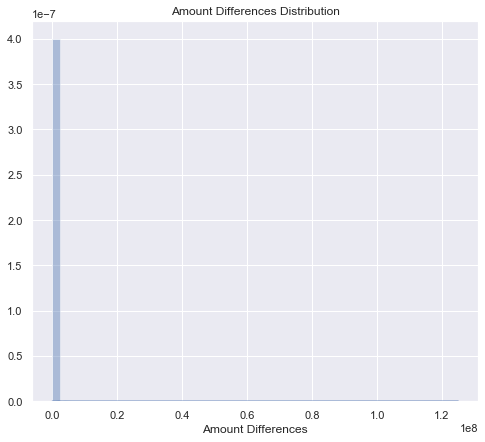

In [54]:
AmtDfr = tsa['Amount Differences'].dropna()
plt.figure(figsize = (8,7))
sns.set(style="darkgrid")
sns.distplot(AmtDfr)
plt.title('Amount Differences Distribution')

There is seems a differences in number that was way far. This time, lets use the Interquartile range (IQR) method to find the datapoint that seems to be an outlier based on the Amount Differences column, show the dataframe, and lets describe the Claim Amount and Close Amount column of the outlier dataframe based on the Amount Differences column

In [55]:
IQR = tsa['Amount Differences'].describe().loc['75%'] - tsa['Amount Differences'].describe().loc['25%']
two = tsa['Amount Differences'].describe().loc['25%']
seven = tsa['Amount Differences'].describe().loc['75%']

In [56]:
bawah = two - (1.5 * IQR)
bawah

-510.0

In [57]:
atas = seven + (1.5 * IQR)
atas

850.0

In [58]:
tsa[(tsa['Amount Differences'] < -510) | (tsa['Amount Differences'] > 850)]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,NewClaimAmount,NewCloseAmount,Amount Differences
4,17846,2002-09-09,2002-08-30 00:00:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN,10.0,1832.22,0.00,1832.22
13,19133,2002-10-02,2002-08-22 00:00:00,CLE,Cleveland Hopkins International,Northwest Airlines,NaN,Other,Computer - Laptop,$2;000.00,Denied,$0.00,Deny,41.0,2000.00,0.00,2000.00
21,18614,2002-10-17,2002-09-14 00:00:00,MCO,Orlando International Airport,American Airlines,Property Damage,Checkpoint,Computer - Laptop,$2;000.00,Settled,$600.00,Settle,33.0,2000.00,600.00,1400.00
23,18356,2002-10-23,2002-09-18 00:00:00,LGA,LaGuardia,NaN,NaN,Checkpoint,Computer - Laptop,$1;801.99,Settled,$291.67,Settle,35.0,1801.99,291.67,1510.32
27,21817,2002-10-29,2002-10-05 00:00:00,MCO,Orlando International Airport,Delta Air Lines,NaN,Other,Other,$7;500.00,Denied,$0.00,Deny,24.0,7500.00,0.00,7500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36208,2009123167012,2009-12-29,2009-12-18 00:00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checked Baggage,NaN,$2;200.00,Denied,$0.00,Deny,11.0,2200.00,0.00,2200.00
36210,2009123167017,2009-12-29,2009-12-02 15:30:00,JFK,John F. Kennedy International,KLM Royal Dutch Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.; Co...,$900.00,Denied,$0.00,Deny,26.0,900.00,0.00,900.00
36213,2010010867323,2009-12-29,2009-12-21 15:15:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Property Damage,Checkpoint,Computer - Laptop,$1;240.00,Denied,$0.00,Deny,7.0,1240.00,0.00,1240.00
36225,2009123066912,2009-12-30,2009-12-15 00:00:00,GSO,Piedmont Triad International Airport,Delta Air Lines,Property Damage,Checked Baggage,NaN,$2;300.00,Denied,$0.00,Deny,15.0,2300.00,0.00,2300.00


In [59]:
liers = tsa[(tsa['Amount Differences'] < -510) | (tsa['Amount Differences'] > 850)]

In [60]:
liers['Amount Differences'].describe()

count    4.103000e+03
mean     4.153118e+04
std      1.954356e+06
min      8.510100e+02
25%      1.181440e+03
50%      1.700000e+03
75%      2.860625e+03
max      1.250000e+08
Name: Amount Differences, dtype: float64

In [61]:
liers['NewCloseAmount'].describe()

count     4103.000000
mean       114.613646
std        686.521806
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      20000.000000
Name: NewCloseAmount, dtype: float64

It seems that Claim Amount feature really affecting lot of the differences that happen as 75% outlier data that in the Close Amount feature is still 0.

## Question

I assume that many of this big differences happen because these people tend to request for bigger money than what it should be. Do you agree or disagree with my assumption (With an assumption that not outlier is have normal amount differences and outlier have a really big amount differences)? why? Try to explain it with the data 

In [62]:
tsa

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,NewClaimAmount,NewCloseAmount,Amount Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full,-333.0,50.00,50.0,0.00
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN,4.0,2270.09,NaN,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny,42.0,200.00,0.0,200.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full,40.0,21.44,21.0,0.44
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN,10.0,1832.22,0.0,1832.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51061,2015110926685,2015-10-22,2015-10-19,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
51062,2015110226479,2015-11-02,2015-11-02,NaN,NaN,NaN,Passenger Property Loss,Checkpoint,Books; Magazines & Other,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
51063,2015120727336,2015-11-16,2015-09-14,NaN,NaN,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN
51064,2015120427297,2015-11-20,2015-10-16,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN


## Analysis

We have try to cleaning some of the data that we have, and now we could try to done few analysis from the data we had. Try to answer this following question.

### Question

1. Is there Any relationship between the Airport and/or the Airline with the number of the claim that happen and the Claim Type? Also why is there a NaN in the Claim Type column?

1. If you realize, there is many different classes in the Status and Disposition column. What pattern you could find in these 2 columns because of this classes variation? is there any relation with the other columns?

In [63]:
tsa.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,NewClaimAmount,NewCloseAmount,Amount Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full,-333.0,50.00,50.0,0.00
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN,4.0,2270.09,NaN,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny,42.0,200.00,0.0,200.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full,40.0,21.44,21.0,0.44
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN,10.0,1832.22,0.0,1832.22


In [64]:
tsa['Claim Number'].nunique()

51065

In [65]:
tsa['Airline Name'].value_counts(normalize=True) * 100

American Airlines             10.554618
Delta Air Lines               10.540150
UAL                            8.456716
Southwest Airlines             7.856282
Continental Airlines           5.698095
                                ...    
Malaysian Airline System       0.002411
Big Sky Airlines               0.002411
Air Aruba                      0.002411
Air New Zealand                0.002411
Aeromar                        0.002411
Name: Airline Name, Length: 242, dtype: float64

In [66]:
tsa['Airline Name'].value_counts().head(10)

American Airlines       4377
Delta Air Lines         4371
UAL                     3507
Southwest Airlines      3258
Continental Airlines    2363
USAir                   2359
Northwest Airlines      2311
Delta Air Lines         2074
Southwest Airlines      1899
Jet Blue                1780
Name: Airline Name, dtype: int64

In [67]:
tsa['Airport Name'].value_counts(normalize=True) * 100

John F. Kennedy International           4.673413
Los Angeles International Airport       3.706430
Newark International Airport            3.571502
Chicago O'Hare International Airport    3.499949
Orlando International Airport           3.338444
                                          ...   
Garden City Municipal                   0.002044
Petersburg                              0.002044
Bradford Regional                       0.002044
Middle Georgia Regional Airport         0.002044
Dubois Jefferson County                 0.002044
Name: Airport Name, Length: 418, dtype: float64

In [68]:
tsa['Airport Name'].value_counts().head(10)

John F. Kennedy International                       2286
Los Angeles International Airport                   1813
Newark International Airport                        1747
Chicago O'Hare International Airport                1712
Orlando International Airport                       1633
Miami International Airport                         1613
Hartsfield-Jackson Atlanta International Airport    1525
Seattle-Tacoma International                        1330
McCarran International                              1278
Phoenix Sky Harbor International                    1267
Name: Airport Name, dtype: int64

In [69]:
check1 = tsa[(tsa['Airport Name'] == 'John F. Kennedy International') & (tsa['Airline Name'] == 'American Airlines')]
check1

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,NewClaimAmount,NewCloseAmount,Amount Differences
49,20113,2002-11-07,2002-10-15,JFK,John F. Kennedy International,American Airlines,Passenger Property Loss,Checkpoint,Cosmetics - Perfume; toilet articles; medicine...,$700.00,Approved,$700.00,Approve in Full,23.0,700.00,700.00,0.00
65,27128,2002-11-15,2002-09-13,JFK,John F. Kennedy International,American Airlines,NaN,Other,Jewelry - Fine,$330.45,Canceled,$0.00,NaN,63.0,330.45,0.00,330.45
70,0715520M,2002-11-20,2002-10-16,JFK,John F. Kennedy International,American Airlines,Passenger Property Loss,Checkpoint,Cameras - Digital,$350.00,Approved,$300.00,Approve in Full,35.0,350.00,300.00,50.00
186,1217014L,2002-12-17,2002-12-04,JFK,John F. Kennedy International,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$268.95,Settled,$199.64,Settle,13.0,268.95,199.64,69.31
270,21531,2003-01-03,2002-07-27,JFK,John F. Kennedy International,American Airlines,NaN,Checkpoint,Cameras - Digital,$400.00,Settled,$318.20,Settle,160.0,400.00,318.20,81.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49845,2015071623870,2015-07-16,2015-07-01,JFK,John F. Kennedy International,American Airlines,Property Damage,Checked Baggage,Baggage/Cases/Purses,$0.00,Deny,NaN,NaN,15.0,0.00,NaN,NaN
49848,2015080524591,2015-07-31,2015-07-30,JFK,John F. Kennedy International,American Airlines,Property Damage,Checkpoint,Computer & Accessories,$822.00,Settle,NaN,NaN,1.0,822.00,NaN,NaN
49875,2015111626921,2015-10-26,2015-10-21,JFK,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Travel Accessories,$11.00,Approve in Full,NaN,NaN,5.0,11.00,NaN,NaN
49883,2015121427530,2015-12-01,2015-10-23,JFK,John F. Kennedy International,American Airlines,Property Damage,Checkpoint,Computer & Accessories,NaN,NaN,NaN,NaN,39.0,NaN,NaN,NaN


In [70]:
PortName = tsa.groupby('Airport Name')

In [71]:
pd.set_option('display.max_columns', None)

In [72]:
PortName.describe()

Day Differences              \
                                                       count        mean   
Airport Name                                                               
 Albert J Ellis; Jacksonville                            2.0  139.000000   
Aberdeen Regional Airport                                9.0   28.888889   
Abilene Regional                                        11.0   27.545455   
Abraham Lincoln Capital Airport; Springfield             4.0   85.500000   
Adak Mitchell Field Airport                              1.0   34.000000   
...                                                      ...         ...   
Yeager; Charleston                                      20.0   32.450000   
Yellowstone                                              2.0   21.500000   
Yellowstone Regional                                     3.0   18.000000   
Youngstown-Warren Regional                               4.0   32.250000   
Yuma International Airport                               7.0   47.428571   

                                                                              \
                                                     std   min    25%    50%   
Airport Name                                                                   
 Albert J Ellis; Jacksonville                 178.190909  13.0  76.00  139.0   
Aberdeen Regional Airport                      23.592607   4.0  12.00   25.0   
Abilene Regional                               21.224343   8.0  18.00   22.0   
Abraham Lincoln Capital Airport; Springfield   57.807151  39.0  59.25   66.5   
Adak Mitchell Field Airport                          NaN  34.0  34.00   34.0   
...                                                  ...   ...    ...    ...   
Yeager; Charleston                             26.835709   3.0  11.75   25.5   
Yellowstone                                    10.606602  14.0  17.75   21.5   
Yellowstone Regional                           19.157244   5.0   7.00    9.0   
Youngstown-Warren Regional                     29.136175   4.0   9.25   31.0   
Yuma International Airport                     36.836835  12.0  18.00   37.0   

                                                            NewClaimAmount  \
                                                 75%    max          count   
Airport Name                                                                 
 Albert J Ellis; Jacksonville                 202.00  265.0            1.0   
Aberdeen Regional Airport                      32.00   72.0            7.0   
Abilene Regional                               27.50   84.0            8.0   
Abraham Lincoln Capital Airport; Springfield   92.75  170.0            4.0   
Adak Mitchell Field Airport                    34.00   34.0            1.0   
...                                              ...    ...            ...   
Yeager; Charleston                             47.25  117.0           19.0   
Yellowstone                                    25.25   29.0            1.0   
Yellowstone Regional                           24.50   40.0            3.0   
Youngstown-Warren Regional                     54.00   63.0            3.0   
Yuma International Airport                     72.50  102.0            6.0   

                                                                              \
                                                    mean          std    min   
Airport Name                                                                   
 Albert J Ellis; Jacksonville                   0.000000          NaN   0.00   
Aberdeen Regional Airport                     586.942857  1321.620958   0.00   
Abilene Regional                              122.355000    89.014487   0.00   
Abraham Lincoln Capital Airport; Springfield  456.332500   739.221338  62.35   
Adak Mitchell Field Airport                     0.000000          NaN   0.00   
...                                                  ...          ...    ...   
Yeager; Charleston                            

In [73]:
LineName = tsa.groupby('Airline Name')

In [74]:
LineName.describe()

Day Differences                        \
                                               count       mean        std   
Airline Name                                                                 
ATA Aerocondor                                 110.0  40.436364  76.005375   
Aer Lingus                                      26.0  81.500000  85.040343   
Aero California                                  1.0  30.000000        NaN   
Aero Flot                                       14.0  30.571429  21.212167   
Aero Mexico                                     41.0  39.170732  47.384018   
...                                              ...        ...        ...   
Western Pacific Airlines Inc Westpac             3.0  59.333333  50.332230   
Westjet Airlines Ltd                            31.0  36.580645  42.295606   
Westjet Airlines Ltd                            50.0  40.300000  42.603655   
XL Airways                                       1.0  29.000000        NaN   
Xtra Airways                                     1.0  27.000000        NaN   

                                                                         \
                                        min    25%   50%     75%    max   
Airline Name                                                              
ATA Aerocondor                       -164.0  11.00  21.5   46.00  548.0   
Aer Lingus                              1.0  23.25  47.5  105.25  316.0   
Aero California                        30.0  30.00  30.0   30.00   30.0   
Aero Flot                               4.0  21.25  24.5   38.75   81.0   
Aero Mexico                             1.0   9.00  24.0   43.00  226.0   
...                                     ...    ...   ...     ...    ...   
Western Pacific Airlines Inc Westpac    6.0  36.00  66.0   86.00  106.0   
Westjet Airlines Ltd                    2.0  11.00  22.0   45.50  180.0   
Westjet Airlines Ltd                   -1.0  13.25  23.0   53.00  199.0   
XL Airways                             29.0  29.00  29.0   29.00   29.0   
Xtra Airways                           27.0  27.00  27.0   27.00   27.0   

                                     NewClaimAmount                \
                                              count          mean   
Airline Name                                                        
ATA Aerocondor                                108.0    497.800185   
Aer Lingus                                     21.0    628.898571   
Aero California                                 1.0    250.000000   
Aero Flot                                       8.0    448.026250   
Aero Mexico                                    37.0    389.021081   
...                                             ...           ...   
Western Pacific Airlines Inc Westpac            2.0     57.555000   
Westjet Airlines Ltd                           29.0  69092.346552   
Westjet Airlines Ltd                           45.0     56.826222   
XL Airways                                      0.0           NaN   
Xtra Airways                                    1.0      0.000000   

                                                                       \
                                                std     min       25%   
Airline Name                                                            
ATA Aerocondor                           642.635068    6.58  117.5000   
Aer Lingus                              1056.056246    0.00   35.9900   
Aero California                                 NaN  250.00  250.0000   
Aero Flot                                655.979144    0.00   75.5925   
Aero Mexico                              926.097842    0.00    0.0000   
...                                             ...     ...       ...   
Western Pacific Airlines Inc Westpac      53.110790   20.00   38.7775   
Westjet Airlines Ltd                  371366.321602    0.00   29.9500   
Westjet Airlines Ltd                     114.049124    0.00    0.0000   
XL Airways                                      Na

In [75]:
tsa['Claim Type'].value_counts()

Passenger Property Loss    29713
Property Damage            18590
Personal Injury              394
Passenger Theft              115
Employee Loss (MPCECA)       114
Motor Vehicle                 96
Complaint                     13
Name: Claim Type, dtype: int64

In [76]:
check1 = tsa[tsa['Claim Type'] == 'Passenger Property Loss']
check2 = tsa[tsa['Claim Type'] == 'Property Damage']

In [77]:
check1['Airline Name'].value_counts()

Delta Air Lines                 2665
American Airlines               2646
UAL                             2072
Southwest Airlines              1955
Continental Airlines            1539
                                ... 
Arika Isreali Airlines             1
Jet Train Airlines                 1
Air 2000 Ltd Great Britain         1
British West Indies Airlines       1
Seaborne Airlines                  1
Name: Airline Name, Length: 219, dtype: int64

In [78]:
check1['Airport Name'].value_counts()

John F. Kennedy International        1607
Newark International Airport         1111
Los Angeles International Airport    1090
Orlando International Airport        1056
Miami International Airport           997
                                     ... 
Joplin Regional                         1
Lea County Regional Airport             1
Gillette-Campbell County                1
Rock Springs-Sweetwater County          1
Middle Georgia Regional Airport         1
Name: Airport Name, Length: 391, dtype: int64

In [79]:
check2['Airline Name'].value_counts()

American Airlines             1507
Delta Air Lines               1504
UAL                           1280
Southwest Airlines            1165
Northwest Airlines             893
                              ... 
Brit Air                         1
SunWing Airlines                 1
Skywest Airlines Inc USA         1
Japan Airlines                   1
Aeromar                          1
Name: Airline Name, Length: 184, dtype: int64

In [80]:
check2['Airport Name'].value_counts()

Chicago O'Hare International Airport                693
Los Angeles International Airport                   602
John F. Kennedy International                       599
Newark International Airport                        545
Hartsfield-Jackson Atlanta International Airport    535
                                                   ... 
Greater Rockford                                      1
Forney Army Airfield                                  1
Hancock County Bar Harbor                             1
Modesto City County Sham Field                        1
Kapalua Airport                                       1
Name: Airport Name, Length: 355, dtype: int64

## 1 Answer:
There doesn't seem to be any connection between between Airport Name and Airline Name, but we can see that American Air and Delta Air are the top choices for an Airline. Looking at the most commonly reported claims, it is not a surprise that the ones that people go to the most have high number of problems simply due to higher people going there. 

A small piece of interesting find is that Newark has more reports of 'Property Damage' than the second highest option for an Airport, which is the Los Angeles, but only by a small margin.

In [81]:
why = tsa[tsa['Claim Type'].isnull()]
why

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,NewClaimAmount,NewCloseAmount,Amount Differences
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny,42.0,200.0,0.00,200.00
6,18202,2002-09-16,2002-08-12,BWI,Baltimore/Washington Intl Thurgood Marshall,NaN,NaN,Checkpoint,Computer - Laptop,$678.00,Approved,$678.00,Approve in Full,35.0,678.0,678.00,0.00
7,16961,2002-09-18,2002-08-05,NaN,NaN,Delta Air Lines,NaN,Checked Baggage,Other,$175.00,Settled,$171.99,Settle,44.0,175.0,171.99,3.01
8,18394,2002-09-20,2002-08-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Checkpoint,Other,$150.00,Denied,$0.00,Deny,39.0,150.0,0.00,150.00
11,0616760L,2002-09-26,NaT,NaN,NaN,NaN,NaN,Other,Locks,NaN,Insufficient; one of the following items requi...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49785,2015011519916,2015-01-15,2014-11-24,JFK,John F. Kennedy International,American Airlines,NaN,Checked Baggage,Personal Accessories,NaN,NaN,NaN,NaN,52.0,NaN,NaN,NaN
50526,2015111826966,2015-11-18,2015-10-25,ORD,Chicago O'Hare International Airport,LOT Polish Airlines,NaN,Checked Baggage,Personal Electronics,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN
50915,2015092825664,2015-09-11,2015-06-02,SJU,Luis Munoz Marin International,NaN,NaN,NaN,Personal Accessories,NaN,NaN,NaN,NaN,101.0,NaN,NaN,NaN
50931,2015081924982,2015-08-17,2015-06-28,SLC,Salt Lake City International Airport,USAir,NaN,Checkpoint,Personal Accessories,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN


In [82]:
why['Claim Site'].value_counts()

Checked Baggage    1203
Other               436
Checkpoint          257
Motor Vehicle         5
Name: Claim Site, dtype: int64

In [83]:
why['Item'].value_counts().head(7)

Other                                         563
Luggage (all types including footlockers)     268
Clothing - Shoes; belts; accessories; etc.    257
Jewelry - Fine                                192
Cameras - Digital                             145
Locks                                          83
Eyeglasses - (including contact lenses)        62
Name: Item, dtype: int64

In [84]:
why['Claim Amount'].sort_values(ascending = False).head(20)

7107     $9;950.00 
5555     $9;512.31 
13488      $999.35 
6182       $998.80 
7028       $998.00 
12371       $99.99 
7165        $99.50 
20821       $99.00 
7308        $99.00 
4002       $985.00 
5519        $98.95 
6284        $98.50 
11739       $98.00 
20849       $98.00 
6337        $98.00 
11889      $972.20 
4713        $96.31 
2043        $96.00 
451        $955.06 
5950       $950.00 
Name: Claim Amount, dtype: object

In [85]:
why['Status'].value_counts()

Denied                                                                                                                           519
Settled                                                                                                                          514
Approved                                                                                                                         427
Canceled                                                                                                                         285
Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.    206
Deny                                                                                                                              11
Closed as a contractor claim                                                                                                       6
Settle                                                               

## 1.5 Answer:

Looking at the relevant informations on why the 'Claim Type' has missing values (is because there is a question where I have to replace it from '-'), it looks like most of it happened during checked baggage, and looking at the 'Claim Amount', the customer is asking for a high amount. This likely means that the customer is filing a complaint because they are saying that their expensive item is missing/damaged. The fact that it says 'Other' makes it hard to know what the item is, but they are discovered to be missing or broken during the checking process. 

Surprisingly, many are 'Approved' or 'Settled', this could mean that the item was broken on the spot instead of prior. The ones denied could mean that the TSA could not verify the legitimacy of the claim.

# 2

In [86]:
tsa['Status'].value_counts()

Denied                                                                                                                           17134
Approved                                                                                                                          8724
Deny                                                                                                                              7010
Settled                                                                                                                           6970
Approve in Full                                                                                                                   3165
Canceled                                                                                                                          1708
Settle                                                                                                                            1453
Insufficient; one of the following items required: sum 

In [87]:
tsa['Disposition'].value_counts()

Deny               17147
Approve in Full     8727
Settle              6972
Name: Disposition, dtype: int64

In [88]:
denied = tsa[tsa['Status'] == 'Denied']

In [89]:
denied['Disposition'].value_counts()

Deny    17125
Name: Disposition, dtype: int64

In [90]:
denied

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,NewClaimAmount,NewCloseAmount,Amount Differences
2,15242,2002-07-12,2002-05-31 00:00:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny,42.0,200.00,0.0,200.00
5,2004050550501,2002-09-11,2002-08-05 00:00:00,BWI,Baltimore/Washington Intl Thurgood Marshall,NaN,Passenger Property Loss,Checkpoint,Other,$1;200.00,Denied,NaN,Deny,37.0,1200.00,NaN,NaN
8,18394,2002-09-20,2002-08-12 00:00:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Checkpoint,Other,$150.00,Denied,$0.00,Deny,39.0,150.00,0.0,150.00
12,0616624L,2002-09-30,2003-08-21 00:00:00,NaN,NaN,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$128.05,Denied,$0.00,Deny,-325.0,128.05,0.0,128.05
13,19133,2002-10-02,2002-08-22 00:00:00,CLE,Cleveland Hopkins International,Northwest Airlines,NaN,Other,Computer - Laptop,$2;000.00,Denied,$0.00,Deny,41.0,2000.00,0.0,2000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36234,2010010667206,2009-12-30,2009-10-09 20:10:00,DFW,Dallas-Fort Worth International Airport,American Airlines,Passenger Property Loss,Checked Baggage,Locks,$8.64,Denied,$0.00,Deny,81.0,8.64,0.0,8.64
36235,2010010667210,2009-12-30,2009-12-29 00:00:00,PHL,Philadelphia International Airport,Southwest Airlines,Passenger Property Loss,Checked Baggage,Video Recordings (blank & commercial),$26.71,Denied,$0.00,Deny,1.0,26.71,0.0,26.71
36236,2010010667213,2009-12-30,2009-12-28 06:00:00,ORF,Norfolk International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Computer peripherals; Cosmetics - Perfume; toi...,$78.04,Denied,$0.00,Deny,1.0,78.04,0.0,78.04
36237,2010010667234,2009-12-30,2009-12-14 00:00:00,RNO,Reno/Tahoe International,UAL,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$120.00,Denied,$0.00,Deny,16.0,120.00,0.0,120.00


In [91]:
denied['Item'].value_counts()

Other                                                                                                                                              2801
Luggage (all types including footlockers)                                                                                                          1873
Clothing - Shoes; belts; accessories; etc.                                                                                                         1349
Jewelry - Fine                                                                                                                                     1316
Computer - Laptop                                                                                                                                  1262
                                                                                                                                                   ... 
Currency; Luggage (all types including footlockers)                                     

In [92]:
denied['Item'].value_counts()

Other                                                                                                                                              2801
Luggage (all types including footlockers)                                                                                                          1873
Clothing - Shoes; belts; accessories; etc.                                                                                                         1349
Jewelry - Fine                                                                                                                                     1316
Computer - Laptop                                                                                                                                  1262
                                                                                                                                                   ... 
Currency; Luggage (all types including footlockers)                                     

## 2 Answer:

The pattern is that 'Disposition' column is to finalize the result. It will always start with missing, or simply unfilled, until the claim has been finalized, where it will give 1 of 3 results. We can easily see that most of the requests have been denied, of course if it's written in the 'Status' as denied, then so will the 'Disposition' column. 

The status is the one that is probably written first and will be updated after the investigation of the claim, and since most of the reports are about missing or damaged items, the investigation can take a while. This could be why some have high Day Differences.

The two columns (Status and Disposition) are mostly connected to the 'Item', 'Claim Type', and 'Claim Amount', because that is what the claims are always about.

## Bonus Question

Could you find any interesting Insight from our data that you could explain? Try to explain it with the available data

Starting with the obvious one, most of the claims are often denied. Adding up the total denied by adding 'Denied' and 'Deny' gives us a total of just about 50%. This means that half the time, over a period of 13 years, claim requests will get denied. The chance to get denied is also quite high is the requested amount is over $1000

In [93]:
tsa['Status'].value_counts(normalize=True) * 100

Denied                                                                                                                           35.787539
Approved                                                                                                                         18.221693
Deny                                                                                                                             14.641686
Settled                                                                                                                          14.558139
Approve in Full                                                                                                                   6.610690
Canceled                                                                                                                          3.567475
Settle                                                                                                                            3.034860
Insufficient; one of the fo

Also shows that there haven't been any kind of errors where the number is less, which would mean that the customer owes the TSA/Airport/Airline.

In [94]:
tsa[tsa['NewCloseAmount'] < 0]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,NewClaimAmount,NewCloseAmount,Amount Differences


In [105]:
tsa.head(3)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,NewClaimAmount,NewCloseAmount,Amount Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full,-333.0,50.00,50.0,0.0
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN,4.0,2270.09,NaN,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny,42.0,200.00,0.0,200.0


In [106]:
tsa.tail(3)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,NewClaimAmount,NewCloseAmount,Amount Differences
51063,2015120727336,2015-11-16,2015-09-14,NaN,NaN,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN
51064,2015120427297,2015-11-20,2015-10-16,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN
51065,2016010428072,2015-12-22,2015-12-20,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Clothing,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN


In [108]:
tsa['NewClaimAmount'].describe()

count    4.688600e+04
mean     4.407323e+03
std      5.807553e+05
min      0.000000e+00
25%      2.702250e+01
50%      1.135100e+02
75%      3.495775e+02
max      1.250000e+08
Name: NewClaimAmount, dtype: float64

In [113]:
over = tsa[tsa['NewClaimAmount'] > 1000]

In [114]:
below = tsa[tsa['NewClaimAmount'] < 1000]

In [118]:
over['Status'].value_counts(normalize=True) * 100

Denied                                                                                                                           68.136814
Settled                                                                                                                          16.516652
Canceled                                                                                                                          4.995500
Approved                                                                                                                          3.510351
Approve in Full                                                                                                                   1.845185
Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.     1.665167
Settle                                                                                                                            1.620162
Closed as a contractor clai

In [117]:
below['Status'].value_counts(normalize=True) *100

Denied                                                                                                                           32.879599
Approved                                                                                                                         20.115051
Deny                                                                                                                             16.594858
Settled                                                                                                                          14.570806
Approve in Full                                                                                                                   7.288954
Settle                                                                                                                            3.264523
Canceled                                                                                                                          2.850244
Insufficient; one of the fo

In [120]:
price = tsa[tsa['Item'] == 'Other']

In [127]:
price['NewClaimAmount'].sort_values(ascending = False)

28528    1571440.0
31790    1000000.0
31530     951200.0
27241     750000.0
17275     250000.0
           ...    
51006          NaN
51021          NaN
51045          NaN
51049          NaN
51054          NaN
Name: NewClaimAmount, Length: 9183, dtype: float64

In [126]:
price['NewClaimAmount'].sort_values(ascending = True)

37988    0.0
37328    0.0
37350    0.0
40360    0.0
37363    0.0
        ... 
51006    NaN
51021    NaN
51045    NaN
51049    NaN
51054    NaN
Name: NewClaimAmount, Length: 9183, dtype: float64

In [130]:
tsa.iloc[28528]

Claim Number                             2007112335357
Date Received                      2007-11-21 00:00:00
Incident Date                      2005-11-30 00:00:00
Airport Code                                       SMF
Airport Name          Sacramento International Airport
Airline Name                                       NaN
Claim Type                             Personal Injury
Claim Site                                  Checkpoint
Item                                             Other
Claim Amount                            $1;571;440.00 
Status                                          Denied
Close Amount                                    $0.00 
Disposition                                       Deny
Day Differences                                    721
NewClaimAmount                             1.57144e+06
NewCloseAmount                                       0
Amount Differences                         1.57144e+06
Name: 28528, dtype: object

In [131]:
tsa.iloc[31790]

Claim Number                2008082549015
Date Received         2008-08-20 00:00:00
Incident Date         2007-06-29 00:00:00
Airport Code                          LGA
Airport Name                    LaGuardia
Airline Name                        USAir
Claim Type                Personal Injury
Claim Site                          Other
Item                                Other
Claim Amount               $1;000;000.00 
Status                             Denied
Close Amount                       $0.00 
Disposition                          Deny
Day Differences                       418
NewClaimAmount                      1e+06
NewCloseAmount                          0
Amount Differences                  1e+06
Name: 31790, dtype: object

In [133]:
injury = tsa[tsa['Claim Type'] == 'Personal Injury']
injury

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,NewClaimAmount,NewCloseAmount,Amount Differences
9,21021,2002-09-24,2002-08-31,PHL,Philadelphia International Airport,Delta Air Lines,Personal Injury,Other,Eyeglasses - (including contact lenses),$50;000.00,In litigation,NaN,NaN,24.0,50000.00,NaN,NaN
271,22241,2003-01-03,2002-12-10,OKC,Will Rogers World,American Airlines,Personal Injury,Checkpoint,Other,$1;090.00,Settled,$90.00,Settle,24.0,1090.00,90.0,1000.0
365,0616541L,2003-01-17,2002-11-09,HNL,Honolulu International Airport,Hawaiian Airlines,Personal Injury,Checkpoint,NaN,$1;280.00,Denied,$0.00,Deny,69.0,1280.00,0.0,1280.0
427,0122027L,2003-01-22,2003-01-10,SUX,Sioux Gateway,Northwest Airlines,Personal Injury,Checkpoint,NaN,$50;000.00,Denied,$0.00,Deny,12.0,50000.00,0.0,50000.0
689,0224089L,2003-02-24,2003-01-30,ATL,Hartsfield-Jackson Atlanta International Airport,UAL,Personal Injury,Checkpoint,Locks,NaN,Canceled,NaN,NaN,25.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51040,2014121619219,2015-03-17,2014-12-03,ZZX,Non TSA Airport (motor vehicle),NaN,Personal Injury,Motor Vehicle,NaN,$4;531.16,Settle,NaN,NaN,104.0,4531.16,NaN,NaN
51041,2015041721971,2015-04-17,2014-10-02,ZZX,Non TSA Airport (motor vehicle),NaN,Personal Injury,Motor Vehicle,NaN,NaN,NaN,NaN,NaN,197.0,NaN,NaN,NaN
51043,2015030320981,2015-06-29,2014-03-21,ZZX,Non TSA Airport (motor vehicle),NaN,Personal Injury,Motor Vehicle,NaN,NaN,NaN,NaN,NaN,465.0,NaN,NaN,NaN
51045,2015083125199,2015-08-14,2013-08-16,ZZX,Non TSA Airport (motor vehicle),NaN,Personal Injury,Motor Vehicle,Other,NaN,NaN,NaN,NaN,728.0,NaN,NaN,NaN


In [135]:
injury['NewClaimAmount'].sort_values( ascending = False)

17190    125000000.0
27696     10000000.0
22010      5000000.0
32577      4000000.0
33704      2000000.0
            ...     
50911            NaN
51041            NaN
51043            NaN
51045            NaN
51047            NaN
Name: NewClaimAmount, Length: 394, dtype: float64

The ones requesting very high amounts seems to be about Personal Injury claims. They are the outliers compared to the others, and it's hard to verify if it's a legit claim, or a scammer trying to get some money. This is also the one that is the most expensive out of the other claims.

To create our dashboard, lets use only the data that was not outlier according to the Amount Differences. As we did not process all the NaN, just drop all those NaN. Save the file as 'tsa_claims_dashboard_ujian.csv', don't include the Index. As we don't want to have too much data in our dashboard, let's just sample 1000 data from our current data.

Also, set the random seed to 101.

In [95]:
np.random.seed(101)

In [96]:
noliers = (tsa[(tsa['Amount Differences'] > -510) | (tsa['Amount Differences'] < 850)]).dropna()

In [97]:
finaloutput = noliers.sample(1000)

In [98]:
finaloutput.to_csv('TSA_Samples.csv',index=False)

In [103]:
finaloutput

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,NewClaimAmount,NewCloseAmount,Amount Differences
25959,2007050424978,2007-05-02,2007-04-20,IAD,Washington Dulles International,KLM Royal Dutch Airlines,Passenger Property Loss,Checkpoint,Cameras - Digital,$350.00,Denied,$0.00,Deny,12.0,350.00,0.0,350.00
17487,2005082491364,2005-08-16,2005-07-11,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Computer - Laptop,$1;500.00,Denied,$0.00,Deny,36.0,1500.00,0.0,1500.00
6527,0202358M,2004-02-02,2003-06-30,PDX,Portland International,Southwest Airlines,Property Damage,Checked Baggage,Eyeglasses - (including contact lenses),$60.00,Approved,$60.00,Approve in Full,217.0,60.00,60.0,0.00
18002,2005092893371,2005-09-19,2005-06-29,SYR,Syracuse-Hancock International,UAL,Property Damage,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full,82.0,15.00,15.0,0.00
30649,2008051944483,2008-05-11,2008-04-30,CLT,Charlotte/Douglas International Airport,USAir,Property Damage,Checked Baggage,Luggage (all types including footlockers),$80.00,Denied,$0.00,Deny,11.0,80.00,0.0,80.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,0328006L,2003-03-28,2003-03-04,SYR,Syracuse-Hancock International,American Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),$350.00,Denied,$0.00,Deny,24.0,350.00,0.0,350.00
28505,2007112735466,2007-11-19,2007-10-19,DFW,Dallas-Fort Worth International Airport,American Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$250.00,Denied,$0.00,Deny,31.0,250.00,0.0,250.00
19220,2005122298263,2005-12-13,2005-01-01,PHL,Philadelphia International Airport,USAir,Property Damage,Checked Baggage,Other,$240.00,Denied,$0.00,Deny,346.0,240.00,0.0,240.00
20184,2006022201973,2006-02-16,2006-01-13,SAN,San Diego International,Frontier Airlines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$340.00,Denied,$0.00,Deny,34.0,340.00,0.0,340.00


Export the data to your SQL database, and try to connect the database to the dashboard